#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 9
### Due: Monday, Apr 4th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Apr 4th.

---

## Problem 1

**Cross-Correlation for computing a time lag**



Using the code snipplet below, generate a pair of time series with known time lag.

The scipy.signal function is used to generate a two-unit impulse function. We then apply a low pass filter of order 4 and with a center frequency of 0.2 to smoothen the edges. (Note that the results will be the same even without the filter).


a) plot the time series

b) compute the lag by computing the time-domain cross-correlation between two-time series.


In [8]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [85]:
# Delta Function
length = 100
amp1, amp2 = 1, 1
x = np.arange(0, length)
to = 10
timeshift = 50
t1 = to+timeshift
series1 = signal.unit_impulse(length, idx=to)
series2 = signal.unit_impulse(length, idx=t1)

# low pass filter to smoothen the edges (just to make the signal look pretty)
b, a = signal.butter(4, 0.2)
series1 = signal.lfilter(b, a, series1)
series2 = signal.lfilter(b, a, series2)

### Solution

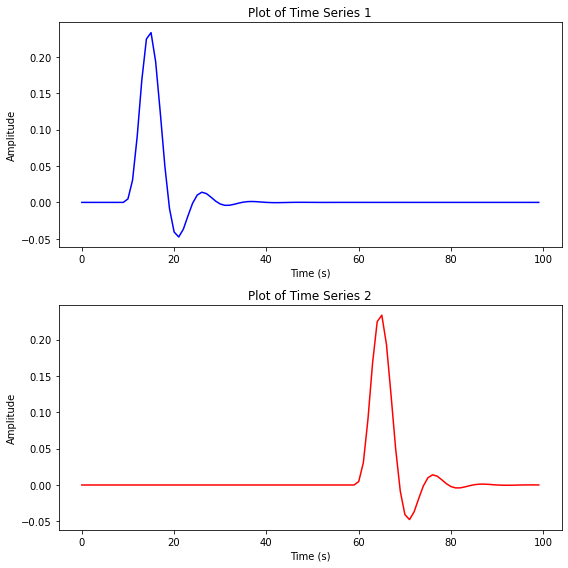

In [86]:
# a) Plot the time series
fig, ax = plt.subplots(2,1,figsize=(8,8))

# Plot series 1
ax[0].plot(x, series1, c="blue")
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Plot of Time Series 1')

# Plot series 2
ax[1].plot(x, series2, c="red")
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Plot of Time Series 2')

plt.tight_layout()
plt.show()

The lag for these two time series is 50 seconds.
The maximum correlation is 0.9999999912348234.


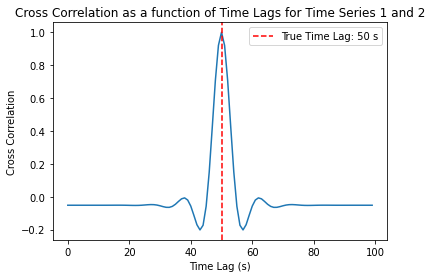

In [119]:
# b) compute the lag by computing the time-domain cross-correlation between 
# two-time series.

# First method: Using my own calculation

# Values that I will need for CCF
x_mu = np.mean(series1)
y_mu = np.mean(series2)
x_omega = np.std(series1)
y_omega = np.std(series2)

# Cross correlation function
def CCF(lag):
    sum = 0
    for i in range(length):
        sum += ((series1[i] - x_mu) * (series2[i - lag] - y_mu)) / (x_omega * y_omega)
    return sum / length

# Possible time delays
# I know that series2 peaks after series1, so I only need to look at positive values
# for lag.
time_lags = np.arange(0, length)

# Compute CCF for all possible delays
CCF_lags = [CCF(lag) for lag in time_lags]

# Find the lag value at which maximum CCF occurs
best_lag = time_lags[np.argmax(CCF_lags)]
print(f'The lag for these two time series is {best_lag} seconds.')
print(f'The maximum correlation is {np.max(CCF_lags)}.')

# Plot the CCF
plt.plot(time_lags, CCF_lags)
plt.xlabel('Time Lag (s)')
plt.ylabel('Cross Correlation')
plt.title('Cross Correlation as a function of Time Lags for Time Series 1 and 2')

# Plot best time lag value
plt.axvline(best_lag, ls='--', c='red', label=f'True Time Lag: {best_lag} s')

plt.legend()
plt.show()

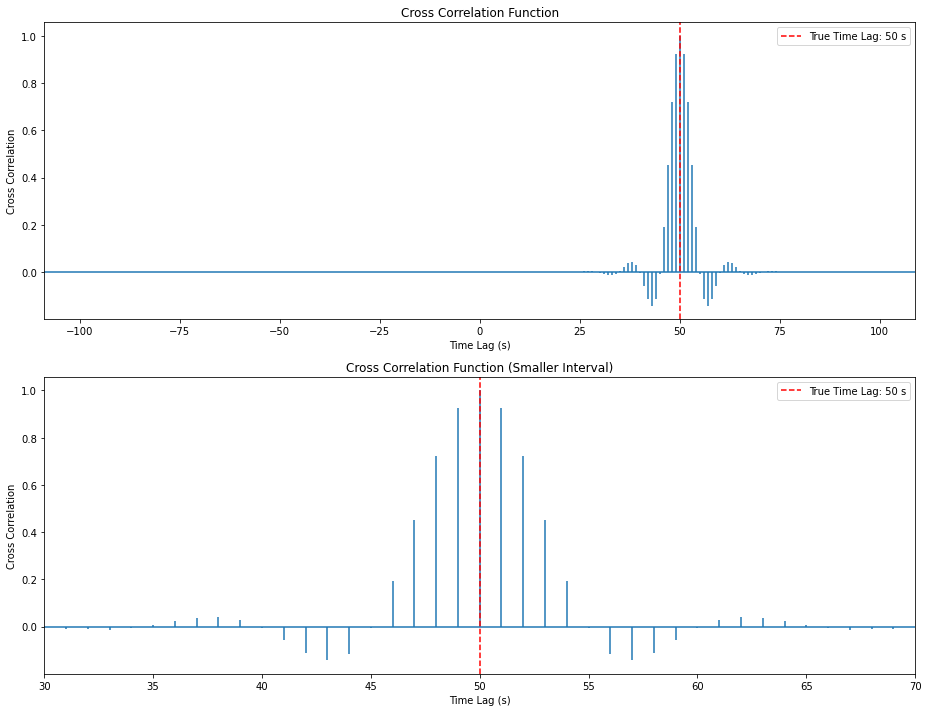

In [120]:
# b) compute the lag by computing the time-domain cross-correlation between 
# two-time series.

# Second Method:
# I will user pyplot's xcorr() function to aid me in this. The documentation is here:
# https://matplotlib.org/2.0.2/api/pyplot_api.html#matplotlib.pyplot.xcorr

fig, ax = plt.subplots(2,1,figsize=(13,10))

# Plot cross correlation with entire length interval
xcorr = ax[0].xcorr(series2, series1, maxlags=length - 1)
lags, xcorr = xcorr[0], xcorr[1]
ax[0].set_xlabel('Time Lag (s)')
ax[0].set_ylabel('Cross Correlation')
ax[0].set_title('Cross Correlation Function')

# Plot cross correlation, but more zoomed in to max peak
ax[1].xcorr(series2, series1, maxlags=75)
ax[1].set_xlim(30, 70)
ax[1].set_xlabel('Time Lag (s)')
ax[1].set_ylabel('Cross Correlation')
ax[1].set_title('Cross Correlation Function (Smaller Interval)')

# Plot best lag as red dashed line
true_lag = lags[np.argmax(xcorr)]
ax[0].axvline(best_lag, ls='--', c='red', label=f'True Time Lag: {true_lag} s')
ax[1].axvline(best_lag, ls='--', c='red', label=f'True Time Lag: {true_lag} s')

ax[0].legend()
ax[1].legend()
plt.tight_layout()

To find a time lag between two time series, I can use the cross-correlation function. Their cross-correlation function will have a peak at $\Delta t = t_{lag}$.

For these two time series, the CCF peaks at 50. This means that there is a 50 second lag, or delay, between the two series.